In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
housing = pd.read_csv("/content/Housing_Original.csv")
housing.shape
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


1. It noticed that the column "Total Bedrooms" have only 20433 data instead of 20640. So there are som data missing

2. Ocean proximity column is not a numeric value, but an object. We will have to convert it to numeric value

Now we are going to take a closer look at the non-numeric value which is the column OCEAN PROXIMITY

In [5]:
 housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


As the number of districts in ISLAND are too minimal (5) compared to the rest of the districts, we can ignore the data.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***housing.hist(bins = 50, figsize=(20,15))***

The command housing.hist(bins=50, figsize=(20,15)) is used in Python—commonly with the Pandas library—to create histograms that visualize the distributions of one or more columns of numerical data in a DataFrame named housing.

**Explanation of Each Parameter**
**hist()**: This is a method of Pandas DataFrames that automatically generates histograms for all numerical columns.​

**bins=50**: This sets the number of bins (intervals or bars) to 50, dividing the range of each numerical column into 50 sections. Each bin counts the number of observations falling within its interval.​

**figsize=(20,15)**: Adjusts the size of the figure, setting the width to 20 units and height to 15 units, making the plots larger and clearer.

**Why Use This in Data Science?**

Creating histograms is a fundamental step in exploring and understanding the distribution of data.​

It helps quickly identify patterns, potential outliers, skewness, and how much data lies within certain ranges

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

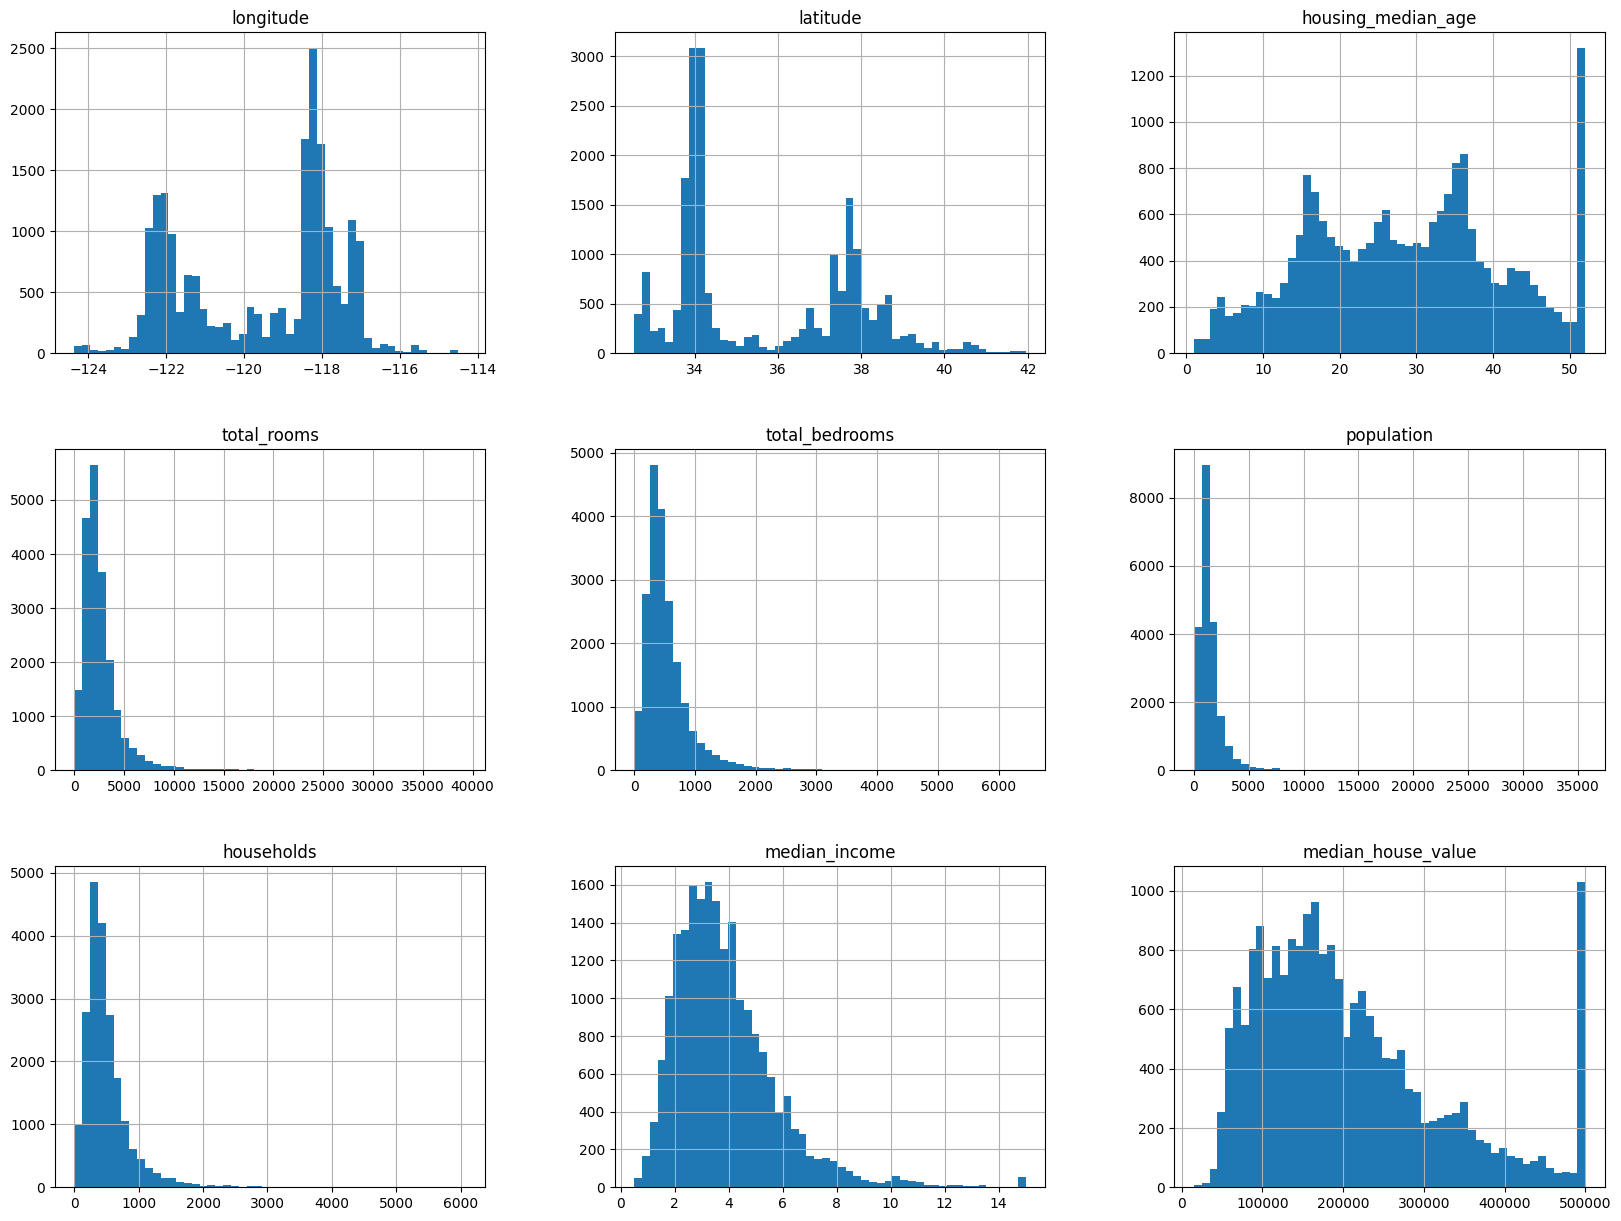

In [7]:
housing.hist(bins = 50, figsize=(20,15))

**Scatter Plot**

The command housing.plot(kind='scatter', x='longitude', y='latitude') in Python (using Pandas) creates a scatter plot from your DataFrame, housing, that visualizes geographical data points using longitude and latitude values.​

**Purpose in Data Science**

**Visualize Spatial Data**: Each record in the housing DataFrame is represented as a dot, with its longitude on the x-axis and latitude on the y-axis, effectively plotting each housing location on a 2D map-like space.​

**Pattern Recognition**: This enables the analyst to see geographical patterns—like clustering of houses, areas of high or low density, or geographic outliers—which is especially useful in real estate and geographic analysis.

**How It Works**
kind='scatter' tells Pandas to make a scatter plot.​

x='longitude', y='latitude' specify which columns from the DataFrame to use for the horizontal and vertical axes, respectively.​

The result is a visual that can highlight if certain locations have a higher concentration of homes, or if there’s a geographical trend in your data.​

Customization
You can further enhance the plot by using parameters like

c (to color points by a variable, such as price),

s (to change marker size), or

alpha (for transparency), which adds more depth to geographic data analysis.​

**Parameter Breakdown**

**kind='scatter'**: Plots each data point as a dot related to its coordinates in the provided columns, ideal for visualizing numeric relationships.​

**x='longitude', y='latitude'**: Sets the horizontal (longitude) and vertical (latitude) coordinates of each point, mapping every housing location spatially.​

**alpha=0.1**: Sets the transparency for each dot. Lower values, like 0.1, make dots more transparent and help see dense clusters more easily.​

**s=housing["population"]/100**: Dictates dot size, with each point’s marker size proportional to the 'population' value at that location. Dividing by 100 helps keep marker sizes manageable.​

**label="population"**: Provides a label for this plot, used in legends to indicate that marker size represents population.​

**c="median_house_value"**: Colors each dot based on its 'median_house_value', allowing visual identification of value gradients or regions with expensive versus cheaper housing.​

**cmap=plt.get_cmap("jet")**: Specifies the color map to use for the 'c' values. Here, "jet" is a common colormap that smoothly transitions through a rainbow spectrum, making value differences clear.

<Axes: xlabel='longitude', ylabel='latitude'>

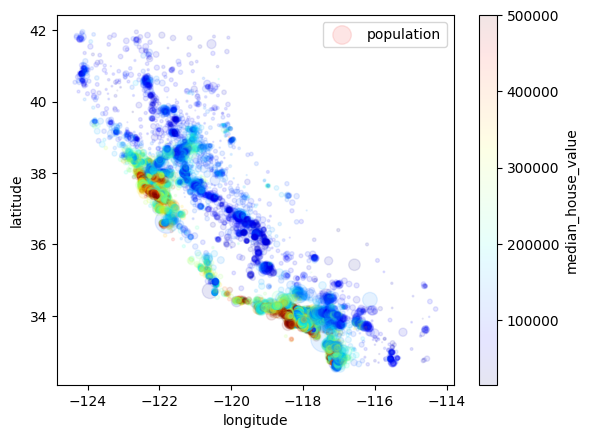

In [8]:
housing.plot(kind='scatter', x= 'longitude', y= 'latitude', alpha = 0.1,
             s = housing["population"]/100, label = "population", c = "median_house_value", cmap = plt.get_cmap("jet"))

In [9]:
housing_na = housing.dropna(subset=["total_bedrooms"])
housing_na.shape

(20433, 10)

In [10]:
housing_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


**Creation of Co-relation**

In [11]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**Create DUMMY cariables - One-Hot Encoding**

In [12]:
dummies = pd.get_dummies(housing_na.ocean_proximity, dtype= int)
#dummies.head()
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


**concartinate**

Now, we need to apply this converted values to the original dataset for further processing. Hence we have to use concrtinate function.

In [13]:
housing_na_dummies = pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,0,0,0,1,0


Drop unwanted columns

In [14]:
housing_clean = housing_na_dummies.drop(['ocean_proximity','ISLAND'], axis = 'columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [16]:
corr_martix = housing_clean.corr()
corr_martix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
population,-0.025300


Now we have to create two datasets,

1. Features > X:
It should include everyhing except the labelled data. The purpose is to predict the median house value.

2. Labels > Y (The prediction dataset)

In [17]:
X = housing_clean.drop(columns=['median_house_value'])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


In [18]:
Y = housing_clean['median_house_value']
Y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


Splitting the dataset into Train and Test data sets.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)

**OLS** is a fundamental method to perform linear regression by optimizing for the best fit line that minimizes squared errors.

**Linear Regression** refers to modeling the relationship between a dependent variable (target) and one or more independent variables (predictors) assuming the relationship is linear.

**OLS Regression** is the most common technique for fitting a linear regression model. It finds the line (or hyperplane) that minimizes the sum of squared differences between observed and predicted values (the residuals).

**Linear Regression**

We need to import Linear Regression from python library sklearn

In [20]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train, Y_train)

LinearRegression()

In [27]:
OLS.predict([[-122.24,	37.85,	52,	1467,	190.0,	496,	177,	7.2574,	0,	0,	1,	0]])

array([379750.73605696])

Display the intercept and coefficients of the OLS model

**Explanation of OLS.intercept_**

intercept_ is an attribute of the fitted OLS regression model.

It represents the intercept or bias term in the linear regression equation:

Y = b0 + b1X1 + b2X2 + ⋯ + bpXp

The intercept b0 is the predicted value of the dependent variable Y when all independent variables Xi are zero.

In scikit-learn and similar libraries, the trailing underscore (_) denotes a fitted attribute, meaning intercept_ is the estimated intercept after the model is trained on data.

**Summary**
Use OLS.intercept_ to access the estimated intercept coefficient after fitting the model.

This value shows where the regression line crosses the y-axis (the predicted Y when X = 0).

In [21]:
print("The intercept is", OLS.intercept_)
print("The coefficients are", OLS.coef_)

The intercept is -2095770.8205082095
The coefficients are [-2.64711029e+04 -2.49687362e+04  1.10154865e+03 -6.42011347e+00
  1.04031393e+02 -3.67929349e+01  4.58711954e+01  3.92488646e+04
 -1.53154235e+05 -1.93368483e+05 -1.57582200e+05 -1.48084046e+05]


**Coefficient**

In a linear regression model, the coefficients (accessed by OLS.coef_) represent how much the dependent variable is expected to change with a one-unit increase in the corresponding independent variable, assuming all other variables are held constant.

**Check for R-square**

R-squared (R²), also called the coefficient of determination, is a statistical measure used in regression models to quantify how well the independent variables explain the variability of the dependent variable. A higher R² indicates a better fit of the model to the data, i.e., the model explains a large portion of the variance in the outcome.

R² ranges from 0 to 1:

0 means the model explains none of the variability; predictions are no better than the mean.

1 means the model perfectly explains all variability; predicted values exactly match observed values.



In [22]:
print("The R-Square value is", OLS.score(X_train, Y_train))

The R-Square value is 0.6487154062260834


In [23]:
Y_pred = OLS.predict(X_test)
performance = pd.DataFrame({"Predictions":Y_pred, "Actual Values": Y_test})
performance["Error"] = performance["Actual Values"] - performance["Predictions"] #created a new column to show the difference between Actual value and predicted value
performance.head()

,Predictions,Actual Values,Error
8289,275280.332242,432500,157219.667758
7211,175797.088365,120000,-55797.088365
7053,203169.318582,164700,-38469.318582
9419,253707.812988,275000,21292.187012
16019,534298.475658,500001,-34297.475658


**Preparing data for plotting**

The index number (8289, 7211,..)shown in the above performance table is a random row number of respective data coming form teh actual dataset.



In [24]:
performance.reset_index(drop = True, inplace = True)
performance.reset_index(inplace = True) # The column Name "Index" is created
performance.head()

,index,Predictions,Actual Values,Error
0,0,275280.332242,432500,157219.667758
1,1,175797.088365,120000,-55797.088365
2,2,203169.318582,164700,-38469.318582
3,3,253707.812988,275000,21292.187012
4,4,534298.475658,500001,-34297.475658


Plot the visuals.

Fig - Figure

This plot shows the performance of model (OLS - Linear Regression), how much accurately the model has learn to make prediction.

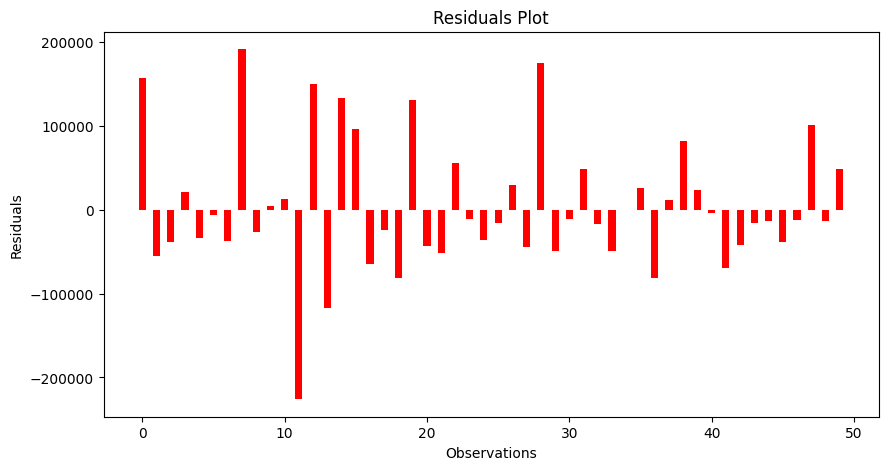

In [25]:
fig = plt.figure(figsize=(10,5))
# The x axis is index, y axis is error, data to be pulled from which table(performance), and color of plotted residuals
#plt.bar('index','Error', data = performance, color = 'Red', width = 0.3)
plt.bar('index','Error', data = performance[:50], color = 'Red', width = 0.5)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The taller the bars, we are far away from the acuals.

In [26]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # add the constant to the dataset, which is necessary in OLS models.
nicerOLS = sm.OLS(Y_train, X_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2514.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:31:41   Log-Likelihood:            -2.0516e+05
No. Observations:               16346   AIC:                         4.104e+05
Df Residuals:                   16333   BIC:                         4.105e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.096e+06   1.04e+05    -20.086      0.000    -2.3e+06   -1.89e+06
longitude          -2.647e+04   1144.630    -23.126      0.000   -2.87e+04   -2.42e+04
latitude           -2.497e+04   1124.592    -22.202      0.000   -2.72e+04   -2.28e+04
housing_median_age  1101.5486     48.935     22.510      0.000    1005.630    1197.468
total_rooms           -6.4201      0.890     -7.216      0.000      -8.164      -4.676
total_bedrooms       104.0314      7.607     13.676      0.000      89.121     118.942
population           -36.7929      1.162    -31.677      0.000     -39.070     -34.516
households            45.8712      8.164      5.619      0.000      29.868      61.874
median_income       3.925e+04    374.516    104.799      0.000    3.85e+04       4e+04
<1H OCEAN          -1.532e+05   3.06e+04     -5.001      0.000   -2.13e+05   -9.31e+04
INLAND             -1.934e+05   3.07e+04     -6.298      0.000   -2.54e+05   -1.33e+05
NEAR BAY           -1.576e+05   3.07e+04     -5.138      0.000   -2.18e+05   -9.75e+04
NEAR OCEAN         -1.481e+05   3.06e+04     -4.833      0.000   -2.08e+05    -8.8e+04
==============================================================================
Omnibus:                     4024.716   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15410.413
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       7.121   Cond. No.                     7.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""